# Decision Trees
Decision Tree for diabetes dataset.

Importing Modules

In [1]:
# importing libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine


# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Splitting data into training and testing set
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from sklearn.metrics import f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call
#import os


Reading and exploring the diabetes dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataframe has no null values, and all are numerical columns. There are no categorical columns, so no encoding required.

Features and target

In [3]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X.shape

(768, 8)

Train Test Split

In [4]:
#random state
r = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r) # 70% training and 30% test

### Decision Tree classifier
Check train and test accuracy

In [5]:
# Create Decision Tree classifer object
# training a model without pruning
unpruned = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
unpruned.fit(X_train,y_train)

#Predict the response for test dataset
y_train_pred = unpruned.predict(X_train)
y_test_pred = unpruned.predict(X_test)

#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy without pruning: {accuracy_score(y_test, y_test_pred)}')
print("At depth:", unpruned.tree_.max_depth)
# print("Performance without pruning:", unpruned.score(X_test, y_test))


Training Accuracy: 1.0
Testing Accuracy without pruning: 0.7012987012987013
At depth: 14


Plotting Training and Testing Confusion Matrix

Training Accuracy: 1.0
Testing Accuracy: 0.7012987012987013


Text(0.5, 1.0, 'Test Confusion Matrix')

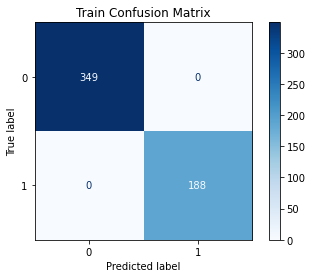

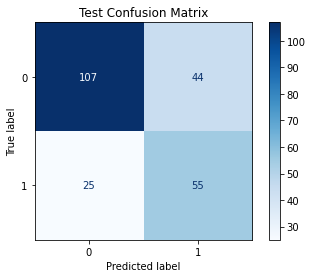

In [6]:
#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')

cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_test, y_test_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')

Tree Plot

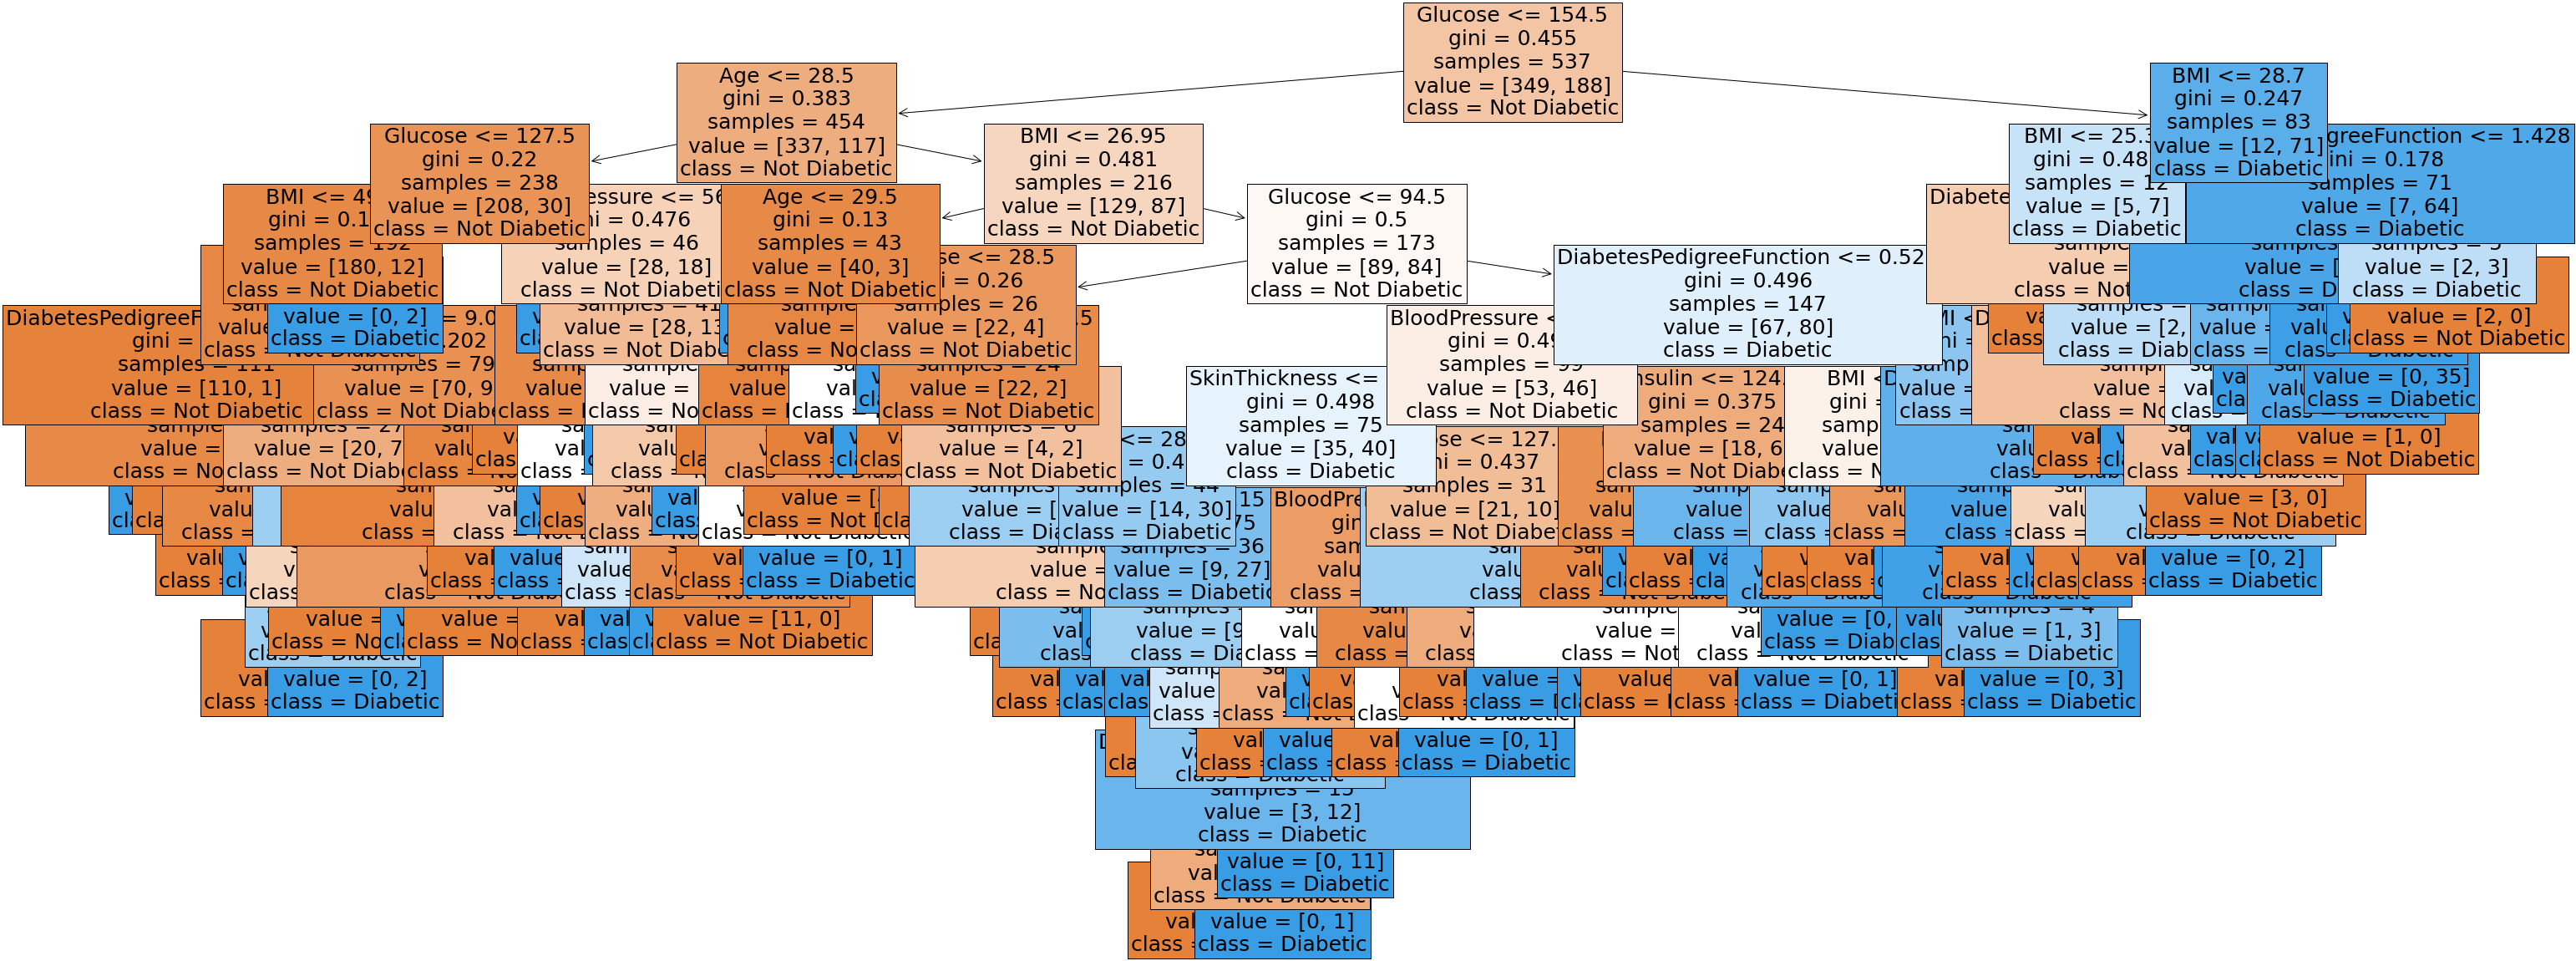

In [7]:
plt.figure(figsize=(50,20))
features = df.columns
classes = ['Not Diabetic','Diabetic']
tree.plot_tree(unpruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

## With Pre-Pruning
Check accuracy values with respect to maximum depth of the decision tree

Text(0, 0.5, 'Accuracy')

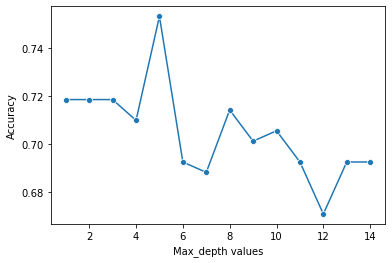

In [8]:
# looking at effect of max_depth pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")

Fitting the tree with max_depth which gives best accuracy i.e. the pruned tree

In [9]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

#pruned = DecisionTreeClassifier(max_depth=best_depth,random_state=r)
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=r,min_samples_leaf=2)

# Train Decision Tree Classifer
pruned.fit(X_train,y_train)
#pruned.fit(X, y)

#Predict the response for test dataset
y_test_pred = pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Best performance reached at depth of: 5
Training Accuracy: 1.0
Testing Accuracy: 0.7792207792207793


Confusion Matrix for pruned tree

Training Accuracy: 1.0
Testing Accuracy: 0.7792207792207793


Text(0.5, 1.0, 'Test Confusion Matrix')

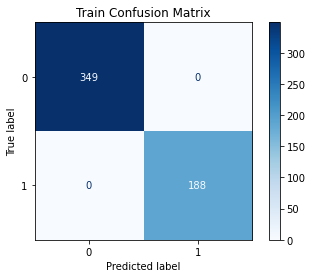

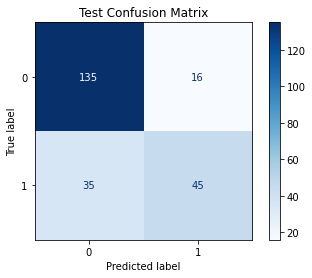

In [10]:
#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')

cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_test, y_test_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')

Pruned Tree

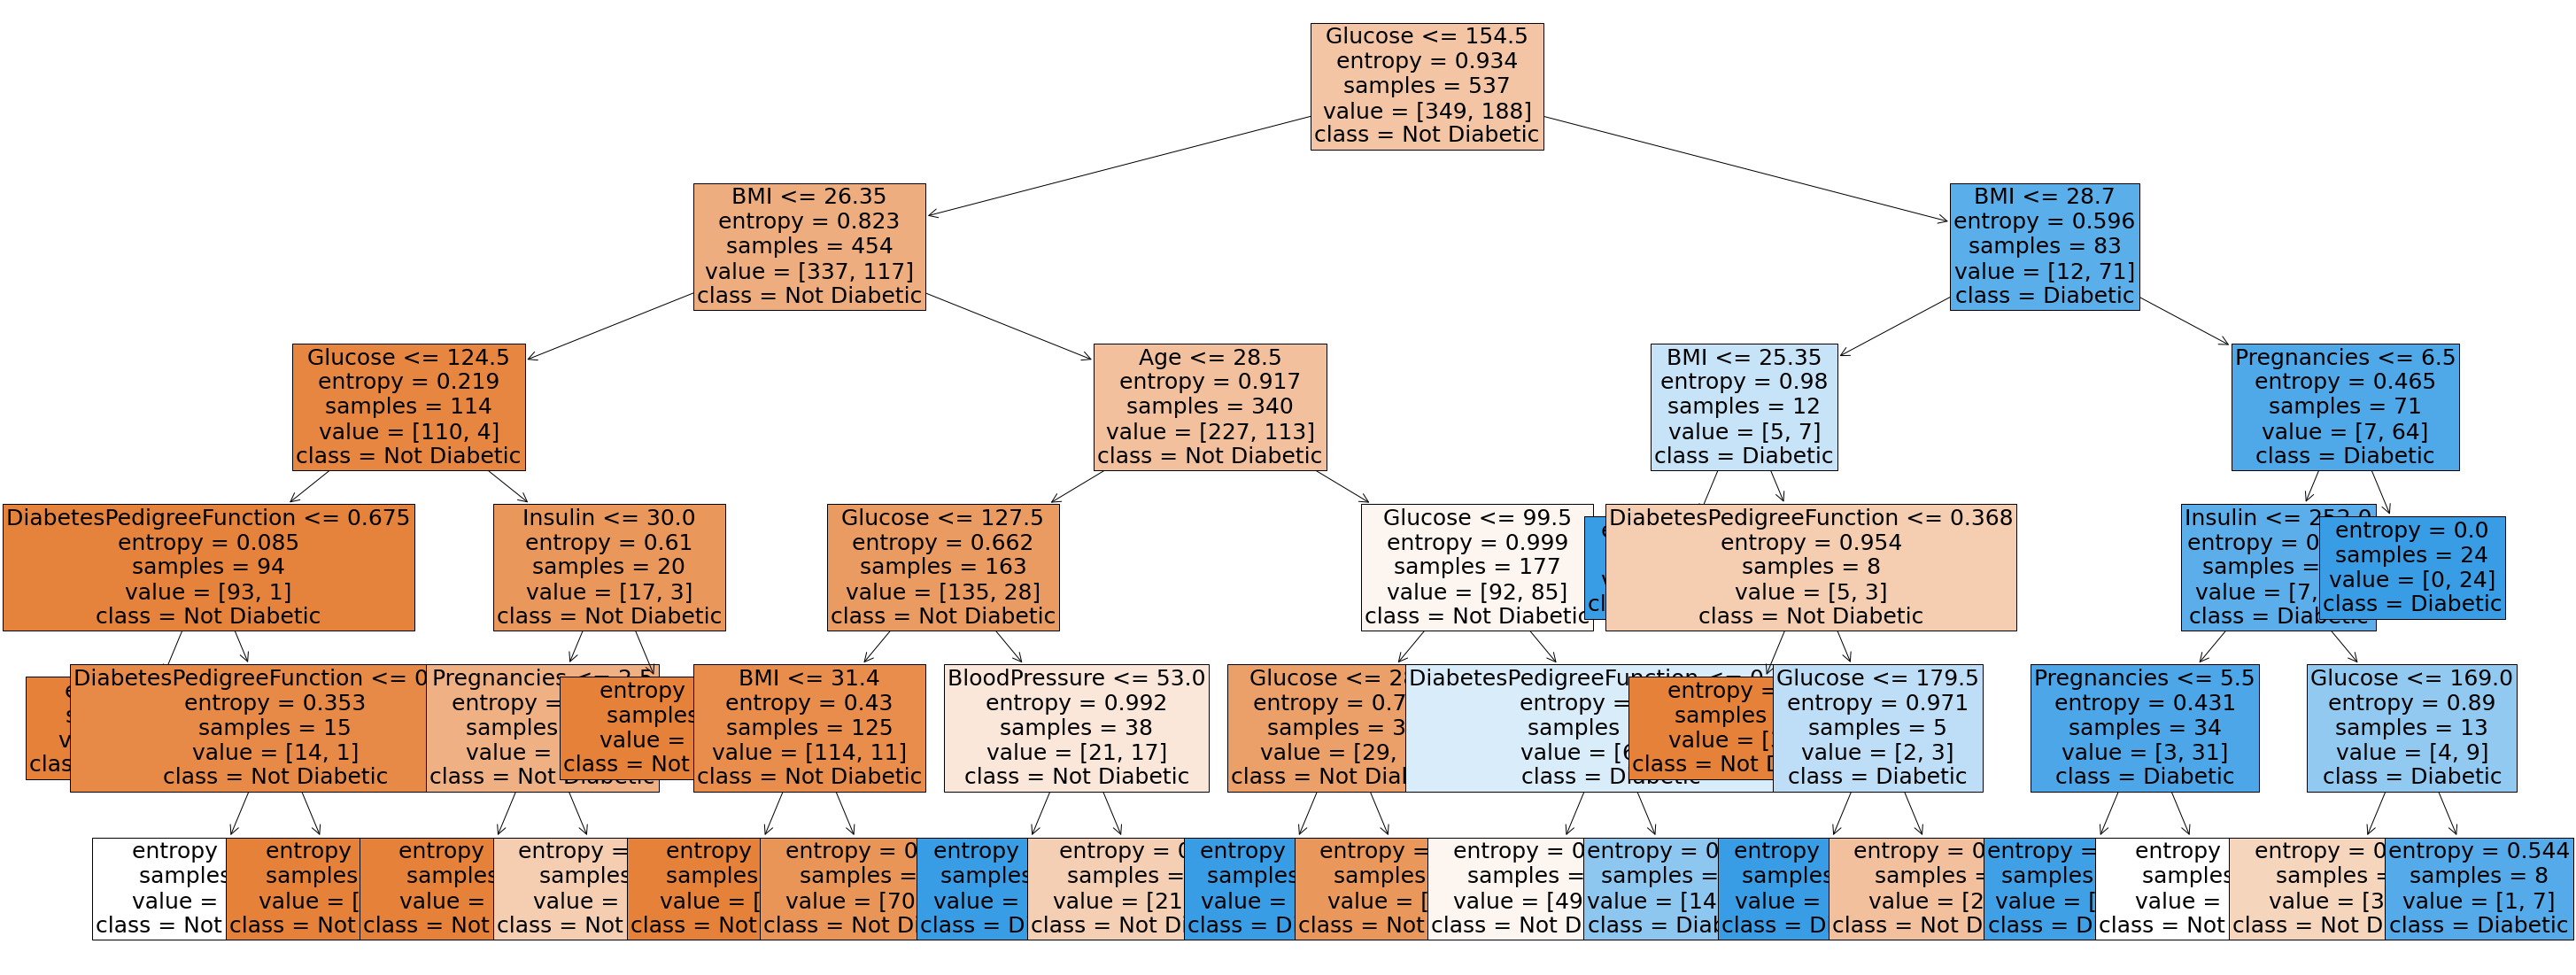

In [11]:
plt.figure(figsize=(50,20)) #Change the width to see all the branches and nodes properly
features = df.columns
classes = ['Not Diabetic','Diabetic']
tree.plot_tree(pruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

# Decision Boundary

We chose two features and try to see what the decision boundary looks like.

In [12]:
X2 = X_train[['Glucose','BMI']] #You can choose any number of features.
y = y_train
feature_names = X2.columns
target_names = ['Not Diabetic','Diabetic']
X2 = X2.to_numpy()
X2.shape

(537, 2)

Decision Surface

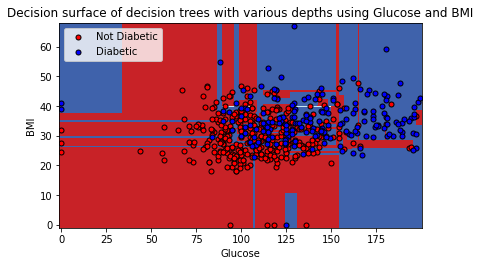

In [13]:
plt.title("Decision surface of decision trees with various depths using Glucose and BMI")

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
clf = DecisionTreeClassifier().fit(X2, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Plot the training points
for i, color in zip(range(3), "rb"):
      idx = np.where(y == i)
      plt.scatter(X2[idx, 0], X2[idx, 1], c=color, 
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=25, label=target_names[i])
  
plt.legend()
plt.show()

## Post-pruning technique

*Cost Complexity Pruning*

Cost complexity pruning is all about finding the right parameter for alpha. We will get the alpha values for this tree and will check the accuracy with the pruned trees. This helps to improve test accuracy and get a better model.



In [14]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00121043 0.00162942 0.0017314  0.00173805 0.00174581
 0.00175874 0.00178771 0.00179057 0.00182171 0.00184542 0.00223464
 0.00223464 0.00227602 0.00248293 0.00251397 0.0027933  0.0027933
 0.0027933  0.0027933  0.00286731 0.00297952 0.00297952 0.00311072
 0.00314459 0.00314722 0.00319234 0.00329957 0.00330039 0.00338581
 0.00341403 0.00351748 0.00379211 0.00380904 0.00387375 0.00437131
 0.00448811 0.00456238 0.00465549 0.00476034 0.00515371 0.00517193
 0.00552394 0.00554124 0.00559205 0.00577759 0.0066157  0.00709763
 0.00714956 0.00774105 0.01253882 0.01494214 0.02217416 0.03229496
 0.09336841]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

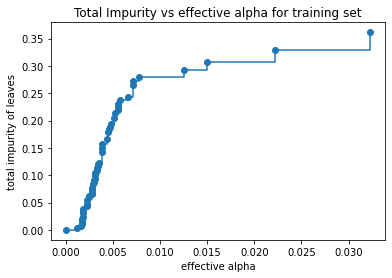

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [16]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

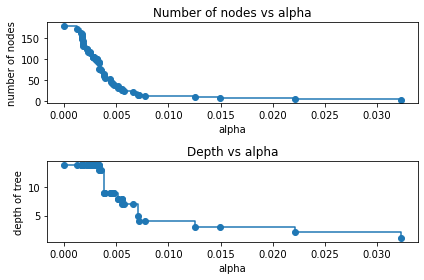

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# sns.lineplot(x=ccp_alphas,y=node_counts,label='no of nodes',marker='o',)
# sns.lineplot(x=ccp_alphas,y=depth,label='depth',marker='o')

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As seen from the above plot, as alpha increases, the number of nodes and depth decreases.

Text(0.5, 1.0, 'Accuracy vs alpha for training and testing sets')

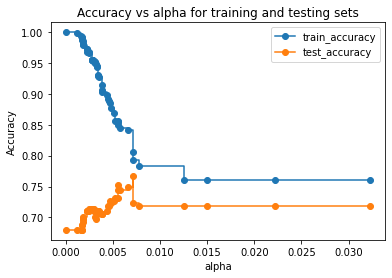

In [18]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.plot(ccp_alphas,train_acc,label='train_accuracy',marker='o',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',marker='o',drawstyle="steps-post")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs alpha for training and testing sets')


We can choose alpha = 0.020

In [19]:
clf_ = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.7597765363128491
Testing Accuracy: 0.7186147186147186


In [20]:
print(classification_report(y_test, y_test_pred, target_names=target_names))


              precision    recall  f1-score   support

Not Diabetic       0.72      0.92      0.81       151
    Diabetic       0.69      0.34      0.45        80

    accuracy                           0.72       231
   macro avg       0.71      0.63      0.63       231
weighted avg       0.71      0.72      0.69       231



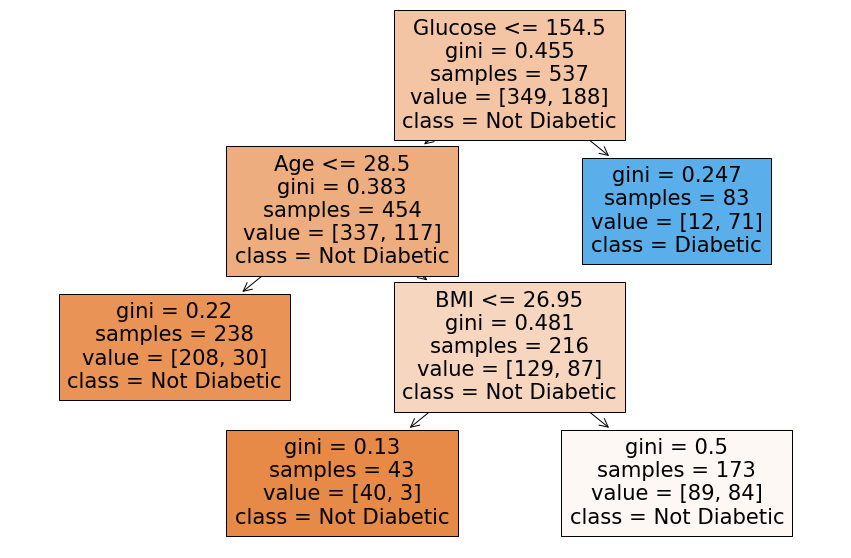

In [21]:
plt.figure(figsize=(15,10))
features = df.columns
classes = ['Not Diabetic','Diabetic']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()